# Brown Data Loader Validation

---

| **Metadata** | **Value** |
|--------------|-----------|
| **Title** | Brown Data Loader Validation |
| **Authors** | Shivan Singal & Christopher Risi |
| **Created** | December 2025 |
| **Last Updated** | December 8, 2025 |
| **Dataset** | `Brown` |
| **Notebook ID** | `0.05` |
| **Status** | Complete |

---

## Purpose

This notebook validates that the `brown_2019` data loader correctly:

1. **Loads data from cache** - Verifies cached data loading works properly
2. **Populates all required properties** - Checks all `DatasetBase` properties are accessible
3. **Provides accurate validation statistics** - Confirms metrics and validation tables are correct
4. **Splits data correctly** - Validates train/validation data splits

## Expected Behavior

- All properties from `DatasetBase` should be accessible
- Cached and non-cached loads should produce identical results  
- Train/validation splits should be properly populated
- All public methods should return valid data

## Prerequisites

- Brown dataset downloaded to `cache/data/brown_2019/`
- Python environment with required dependencies installed

---

## 1. Setup and Imports

In [21]:
from src.data.diabetes_datasets.data_loader import get_loader
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

## 2. Load Data (Cached)

In [22]:
loader = get_loader(
    data_source_name="brown_2019",
    dataset_type="train",
    use_cached=True,
    parallel=True,
    max_workers=20,
)

/Volumes/LaCieSSD/WATai/BGC/nocturnal-hypo-gly-prob-forecast/src/data/cache_manager.py:503: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
2026-01-07T14:39:18 - Loaded 168 patients from cache
2026-01-07T14:39:20 - Split complete: 168 train patients, 168 validation patients
2026-01-07T14:39:21 - Dataset validation: {'total_rows': 9742311, 'unique_patients': 168, 'patients_with_insulin': 168, 'patients_cgm_only': 0, 'glucose_mean_mmol': 8.91, 'glucose_std_mmol': 3.4, 'glucose_min_mmol': 2.17, 'glucose_max_mmol': 22.28}


## 3. Validate Required Properties

Every data loader should implement these properties from `DatasetBase`:

In [23]:
# Property: dataset_name
print(f"Dataset Name: {loader.dataset_name}")
assert loader.dataset_name == "brown_2019", "Dataset name mismatch!"

Dataset Name: brown_2019


In [24]:
# Property: num_patients
print(f"Number of Patients: {loader.num_patients}")
assert loader.num_patients > 0, "No patients loaded!"

Number of Patients: 168


In [25]:
# Property: patient_ids
print(f"Patient IDs: {loader.patient_ids}")
assert len(loader.patient_ids) == loader.num_patients, "Patient ID count mismatch!"

Patient IDs: ['171', '170', '138', '65', '139', '64', '12', '13', '80', '81', '106', '107', '132', '133', '26', '27', '1', '51', '50', '145', '18', '144', '19', '72', '73', '166', '167', '111', '110', '97', '96', '158', '159', '31', '30', '78', '125', '79', '124', '152', '153', '46', '47', '75', '128', '74', '129', '161', '160', '116', '117', '90', '91', '36', '37', '122', '123', '155', '154', '41', '40', '62', '63', '87', '86', '148', '15', '149', '14', '101', '100', '135', '68', '134', '69', '21', '20', '56', '57', '7', '6', '142', '143', '32', '126', '127', '151', '150', '45', '118', '44', '119', '71', '70', '38', '165', '39', '164', '112', '113', '94', '95', '131', '130', '25', '24', '3', '2', '52', '53', '89', '88', '146', '147', '66', '67', '10', '83', '82', '105', '58', '104', '59', '9', '8', '136', '137', '22', '23', '108', '55', '109', '54', '4', '5', '141', '140', '28', '29', '61', '60', '85', '16', '17', '102', '103', '35', '168', '34', '169', '121', '120', '99', '98', '156'

In [26]:
# Property: train_data_shape_summary
print("Train Data Shape Summary:")
for patient_id, shape in loader.train_data_shape_summary.items():
    print(f"  {patient_id}: {shape}")

Train Data Shape Summary:
  171: (51923, 11)
  170: (51635, 11)
  138: (50521, 11)
  65: (52211, 11)
  139: (50565, 11)
  64: (50772, 11)
  12: (50772, 11)
  13: (51636, 11)
  80: (51923, 11)
  81: (50483, 11)
  106: (50484, 11)
  107: (49619, 11)
  132: (50483, 11)
  133: (51347, 11)
  26: (50483, 11)
  27: (50195, 11)
  1: (52212, 11)
  51: (49907, 11)
  50: (50137, 11)
  145: (52499, 11)
  18: (50772, 11)
  144: (49422, 11)
  19: (52212, 11)
  72: (52211, 11)
  73: (49757, 11)
  166: (51635, 11)
  167: (50483, 11)
  111: (52211, 11)
  110: (52500, 11)
  97: (51060, 11)
  96: (49331, 11)
  158: (48755, 11)
  159: (49907, 11)
  31: (49619, 11)
  30: (52211, 11)
  78: (51060, 11)
  125: (48467, 11)
  79: (51635, 11)
  124: (52211, 11)
  152: (49088, 11)
  153: (50195, 11)
  46: (49881, 11)
  47: (51636, 11)
  75: (52212, 11)
  128: (50771, 11)
  74: (52499, 11)
  129: (51059, 11)
  161: (51923, 11)
  160: (50771, 11)
  116: (50771, 11)
  117: (51923, 11)
  90: (50484, 11)
  91: (51347,

In [27]:
# Property: dataset_info
print("Dataset Info:")
for key, value in loader.dataset_info.items():
    if isinstance(value, dict) and len(str(value)) > 100:
        print(f"  {key}: <dict with {len(value)} items>")
    else:
        print(f"  {key}: {value}")

Dataset Info:
  dataset_name: brown_2019
  num_patients: 168
  patient_ids: ['171', '170', '138', '65', '139', '64', '12', '13', '80', '81', '106', '107', '132', '133', '26', '27', '1', '51', '50', '145', '18', '144', '19', '72', '73', '166', '167', '111', '110', '97', '96', '158', '159', '31', '30', '78', '125', '79', '124', '152', '153', '46', '47', '75', '128', '74', '129', '161', '160', '116', '117', '90', '91', '36', '37', '122', '123', '155', '154', '41', '40', '62', '63', '87', '86', '148', '15', '149', '14', '101', '100', '135', '68', '134', '69', '21', '20', '56', '57', '7', '6', '142', '143', '32', '126', '127', '151', '150', '45', '118', '44', '119', '71', '70', '38', '165', '39', '164', '112', '113', '94', '95', '131', '130', '25', '24', '3', '2', '52', '53', '89', '88', '146', '147', '66', '67', '10', '83', '82', '105', '58', '104', '59', '9', '8', '136', '137', '22', '23', '108', '55', '109', '54', '4', '5', '141', '140', '28', '29', '61', '60', '85', '16', '17', '102', '

## 4. Validate Data Containers

Check that `processed_data`, `train_data`, and `validation_data` are properly populated.

In [28]:
# Check processed_data
print("Processed Data:")
assert loader.processed_data is not None, "processed_data is None!"
assert isinstance(loader.processed_data, dict), "processed_data should be a dict!"
print(f"  Type: {type(loader.processed_data).__name__}")
print(f"  Number of patients: {len(loader.processed_data)}")

Processed Data:
  Type: dict
  Number of patients: 168


In [29]:
# Check train_data
print("Train Data:")
assert loader.train_data is not None, "train_data is None!"
assert isinstance(loader.train_data, dict), "train_data should be a dict!"
print(f"  Type: {type(loader.train_data).__name__}")
print(f"  Number of patients: {len(loader.train_data)}")
for patient_id, df in loader.train_data.items():
    print(f"  {patient_id}: {df.shape}")

Train Data:
  Type: dict
  Number of patients: 168
  171: (51923, 11)
  170: (51635, 11)
  138: (50521, 11)
  65: (52211, 11)
  139: (50565, 11)
  64: (50772, 11)
  12: (50772, 11)
  13: (51636, 11)
  80: (51923, 11)
  81: (50483, 11)
  106: (50484, 11)
  107: (49619, 11)
  132: (50483, 11)
  133: (51347, 11)
  26: (50483, 11)
  27: (50195, 11)
  1: (52212, 11)
  51: (49907, 11)
  50: (50137, 11)
  145: (52499, 11)
  18: (50772, 11)
  144: (49422, 11)
  19: (52212, 11)
  72: (52211, 11)
  73: (49757, 11)
  166: (51635, 11)
  167: (50483, 11)
  111: (52211, 11)
  110: (52500, 11)
  97: (51060, 11)
  96: (49331, 11)
  158: (48755, 11)
  159: (49907, 11)
  31: (49619, 11)
  30: (52211, 11)
  78: (51060, 11)
  125: (48467, 11)
  79: (51635, 11)
  124: (52211, 11)
  152: (49088, 11)
  153: (50195, 11)
  46: (49881, 11)
  47: (51636, 11)
  75: (52212, 11)
  128: (50771, 11)
  74: (52499, 11)
  129: (51059, 11)
  161: (51923, 11)
  160: (50771, 11)
  116: (50771, 11)
  117: (51923, 11)
  90: 

In [30]:
# Check validation_data
print("Validation Data:")
assert loader.validation_data is not None, "validation_data is None!"
assert isinstance(loader.validation_data, dict), "validation_data should be a dict!"
print(f"  Type: {type(loader.validation_data).__name__}")
print(f"  Number of patients: {len(loader.validation_data)}")
for patient_id, df in loader.validation_data.items():
    print(f"  {patient_id}: {df.shape}")

Validation Data:
  Type: dict
  Number of patients: 168
  171: (5761, 11)
  170: (5761, 11)
  138: (5761, 11)
  65: (6049, 11)
  139: (5761, 11)
  64: (5761, 11)
  12: (5761, 11)
  13: (6049, 11)
  80: (6049, 11)
  81: (5761, 11)
  106: (5761, 11)
  107: (5761, 11)
  132: (5761, 11)
  133: (5761, 11)
  26: (5761, 11)
  27: (5761, 11)
  1: (6049, 11)
  51: (5761, 11)
  50: (5761, 11)
  145: (6049, 11)
  18: (5761, 11)
  144: (5473, 11)
  19: (6049, 11)
  72: (6049, 11)
  73: (5761, 11)
  166: (5761, 11)
  167: (5761, 11)
  111: (6049, 11)
  110: (6049, 11)
  97: (5761, 11)
  96: (5761, 11)
  158: (5473, 11)
  159: (5761, 11)
  31: (5761, 11)
  30: (6049, 11)
  78: (5761, 11)
  125: (5473, 11)
  79: (5761, 11)
  124: (6049, 11)
  152: (5761, 11)
  153: (5761, 11)
  46: (5761, 11)
  47: (5761, 11)
  75: (6049, 11)
  128: (5761, 11)
  74: (6049, 11)
  129: (5761, 11)
  161: (6049, 11)
  160: (5761, 11)
  116: (5761, 11)
  117: (6049, 11)
  90: (5761, 11)
  91: (5761, 11)
  36: (6049, 11)
 

## 5. Validate Public Methods

In [31]:
# Method: get_patient_data()
sample_patient_id = loader.patient_ids[0]
patient_data = loader.get_patient_data(sample_patient_id)

print(f"get_patient_data('{sample_patient_id}'):")
assert patient_data is not None, "get_patient_data returned None!"
print(f"  Shape: {patient_data.shape}")
print(f"  Columns: {list(patient_data.columns)}")
print(f"  Index type: {type(patient_data.index).__name__}")
print(f"  Date range: {patient_data.index.min()} to {patient_data.index.max()}")

get_patient_data('171'):
  Shape: (57711, 11)
  Columns: ['p_num', 'period', 'bg_mM', 'rate', 'dose_units', 'bolus_type', 'bolus', 'cob', 'carb_availability', 'insulin_availability', 'iob']
  Index type: DatetimeIndex
  Date range: 2018-04-07 00:00:00 to 2018-10-24 09:10:00


In [32]:
# Method: get_combined_data()
print("get_combined_data() options:")

combined_all = loader.get_combined_data(data_type="all")
print(f"  data_type='all': {combined_all.shape}")

combined_train = loader.get_combined_data(data_type="train")
print(f"  data_type='train': {combined_train.shape}")

combined_val = loader.get_combined_data(data_type="validation")
print(f"  data_type='validation': {combined_val.shape}")

get_combined_data() options:
  data_type='all': (9742311, 11)
  data_type='train': (8720821, 11)
  data_type='validation': (996072, 11)


## 6. Validation Statistics

Display comprehensive validation metrics computed by the loader.

In [33]:
# Data metrics (if available)
if hasattr(loader, "data_metrics") and loader.data_metrics:
    print("Data Metrics:")
    for key, value in loader.data_metrics.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("No data_metrics available.")

Data Metrics:
  total_rows: 9742311
  unique_patients: 168
  patients_with_insulin: 168
  patients_cgm_only: 0
  glucose_mean_mmol: 8.9100
  glucose_std_mmol: 3.4000
  glucose_min_mmol: 2.1700
  glucose_max_mmol: 22.2800


In [34]:
# Create validation table
if hasattr(loader, "create_validation_table"):
    validation_table = loader.create_validation_table()
    print("Validation Table:")
    display(validation_table)
else:
    print("create_validation_table() method not available.")

Validation Table:


,patient_id,num_days,num_data_points,start_date,end_date,date_type,age,sex,avg_bg_mM,min_bg_mM,max_bg_mM,avg_carbs_g,min_carbs_g,max_carbs_g,avg_insulin_units,min_insulin_units,max_insulin_units,num_train_data_points,num_validation_data_points
0,171,201,57711,2018-04-07 00:00:00,2018-10-24 09:10:00,real,None,None,6.994299,2.17,19.17,None,None,None,0.157223,0.01,15.07,51923,5761
1,170,200,57484,2018-04-14 00:00:00,2018-10-30 14:15:00,real,None,None,10.274742,2.17,22.28,None,None,None,0.000000,0.00,0.00,51635,5761
2,138,197,56486,2018-05-23 20:50:00,2018-12-05 23:55:00,real,None,None,9.933546,2.17,22.28,None,None,None,0.554031,0.01,26.25,50521,5761
3,65,203,58464,2017-12-24 00:00:00,2018-07-14 23:55:00,real,None,None,9.175009,2.17,22.28,None,None,None,0.281565,0.01,22.24,52211,6049
4,139,197,56530,2018-08-14 17:10:00,2019-02-26 23:55:00,real,None,None,11.787241,2.17,22.28,None,None,None,0.180815,0.06,20.45,50565,5761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,115,203,58177,2017-12-01 23:55:00,2018-06-21 23:55:00,real,None,None,8.682121,2.17,22.28,None,None,None,0.149337,0.01,12.07,51924,6049
164,49,203,58186,2017-09-27 00:00:00,2018-04-17 00:45:00,real,None,None,9.284906,2.28,22.28,None,None,None,0.000000,0.00,0.00,51923,6049
165,114,193,55391,2017-12-14 14:55:00,2018-06-24 22:45:00,real,None,None,9.441142,2.17,22.28,None,None,None,0.150313,0.01,12.60,49440,5761
166,93,191,55008,2018-06-29 00:00:00,2019-01-05 23:55:00,real,None,None,8.407810,2.17,22.28,None,None,None,0.159416,0.01,17.08,49331,5473


### 6.1 Data Distribution Visualizations

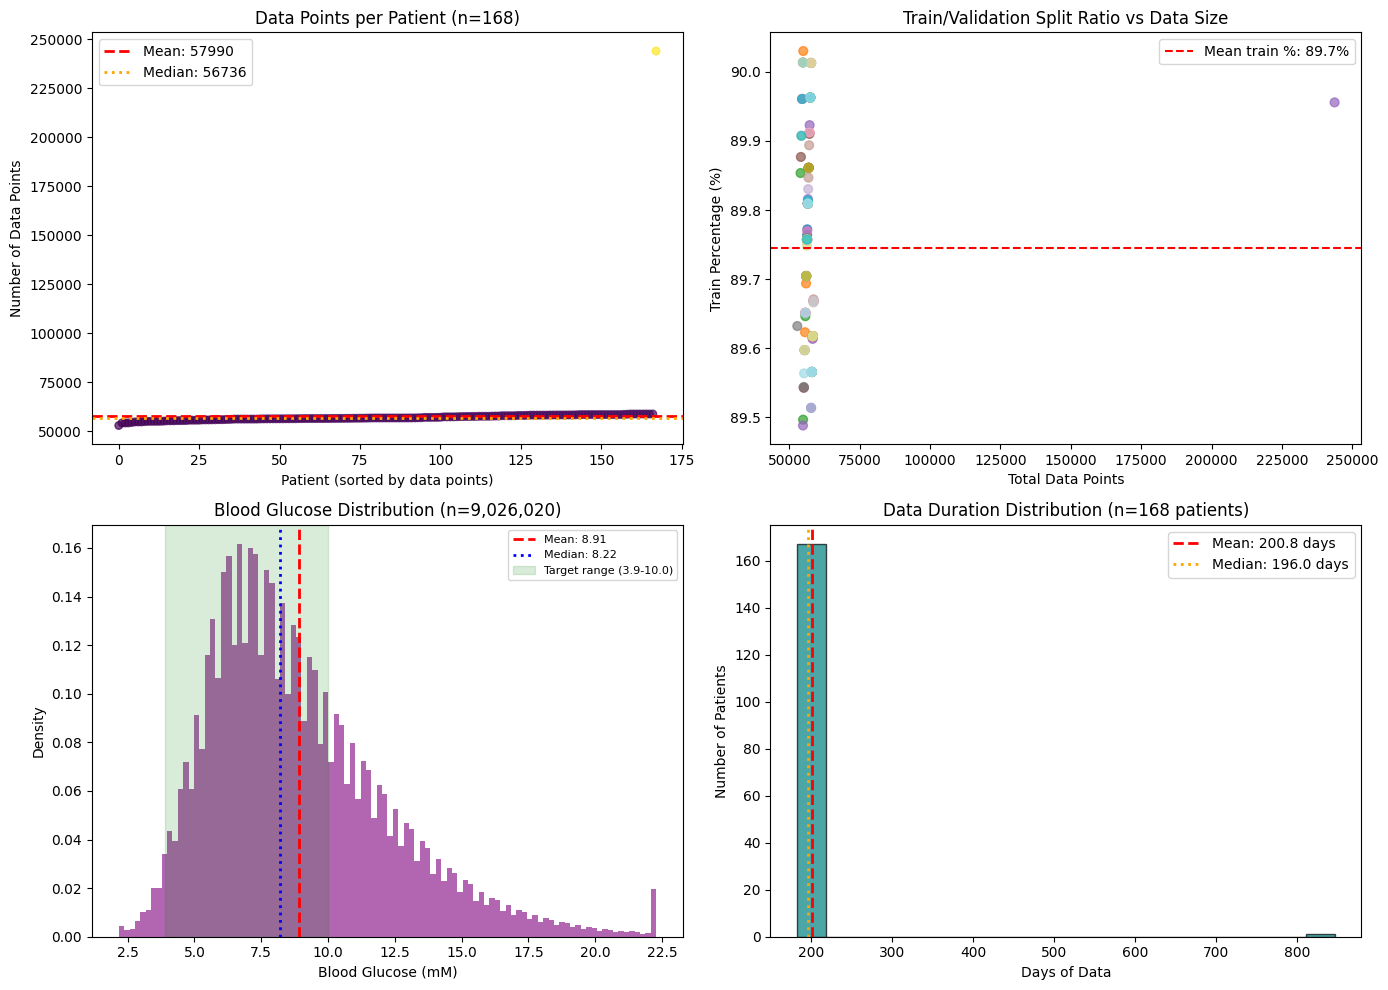

In [35]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

patient_ids = list(loader.processed_data.keys())
data_points = [len(df) for df in loader.processed_data.values()]

# Plot 1: Scatter plot of data points per patient (sorted by size)
ax1 = axes[0, 0]
sorted_indices = np.argsort(data_points)
sorted_points = np.array(data_points)[sorted_indices]
ax1.scatter(
    range(len(patient_ids)),
    sorted_points,
    c=sorted_points,
    cmap="viridis",
    s=30,
    alpha=0.7,
)
ax1.axhline(
    y=np.mean(data_points),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(data_points):.0f}",
)
ax1.axhline(
    y=np.median(data_points),
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(data_points):.0f}",
)
ax1.set_xlabel("Patient (sorted by data points)")
ax1.set_ylabel("Number of Data Points")
ax1.set_title(f"Data Points per Patient (n={len(patient_ids)})")
ax1.legend()
ax1.set_yscale("log") if max(data_points) / min(data_points) > 10 else None

# Plot 2: Train vs Validation ratio scatter
ax2 = axes[0, 1]
if loader.train_data and loader.validation_data:
    train_points = [len(loader.train_data.get(pid, [])) for pid in patient_ids]
    val_points = [len(loader.validation_data.get(pid, [])) for pid in patient_ids]
    total_points = [t + v for t, v in zip(train_points, val_points)]
    train_ratio = [
        t / tot * 100 if tot > 0 else 0 for t, tot in zip(train_points, total_points)
    ]

    scatter = ax2.scatter(
        total_points,
        train_ratio,
        c=range(len(patient_ids)),
        cmap="tab20",
        s=40,
        alpha=0.7,
    )
    ax2.axhline(
        y=np.mean(train_ratio),
        color="red",
        linestyle="--",
        label=f"Mean train %: {np.mean(train_ratio):.1f}%",
    )
    ax2.set_xlabel("Total Data Points")
    ax2.set_ylabel("Train Percentage (%)")
    ax2.set_title("Train/Validation Split Ratio vs Data Size")
    ax2.legend()
else:
    ax2.text(
        0.5,
        0.5,
        "No train/validation split available",
        ha="center",
        va="center",
        transform=ax2.transAxes,
    )

# Plot 3: Blood glucose distribution (histogram with KDE-style smoothing)
ax3 = axes[1, 0]
combined_data = loader.get_combined_data(data_type="all")
bg_col = (
    "bg_mM"
    if "bg_mM" in combined_data.columns
    else "bg_mg_dl"
    if "bg_mg_dl" in combined_data.columns
    else None
)

if bg_col:
    bg_data = combined_data[bg_col].dropna()
    bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"
    hypo = 3.9 if bg_col == "bg_mM" else 70
    hyper = 10.0 if bg_col == "bg_mM" else 180

    ax3.hist(
        bg_data, bins=100, density=True, color="purple", edgecolor="none", alpha=0.6
    )
    ax3.axvline(
        x=bg_data.mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {bg_data.mean():.2f}",
    )
    ax3.axvline(
        x=bg_data.median(),
        color="blue",
        linestyle=":",
        linewidth=2,
        label=f"Median: {bg_data.median():.2f}",
    )
    ax3.axvspan(
        hypo, hyper, alpha=0.15, color="green", label=f"Target range ({hypo}-{hyper})"
    )
    ax3.set_xlabel(f"Blood Glucose ({bg_unit})")
    ax3.set_ylabel("Density")
    ax3.set_title(f"Blood Glucose Distribution (n={len(bg_data):,})")
    ax3.legend(fontsize=8)
else:
    ax3.text(
        0.5,
        0.5,
        "No blood glucose column found",
        ha="center",
        va="center",
        transform=ax3.transAxes,
    )

# Plot 4: Data duration distribution (histogram)
ax4 = axes[1, 1]
durations = []
for pid, df in loader.processed_data.items():
    if hasattr(df.index, "min") and hasattr(df.index, "max"):
        try:
            duration = (df.index.max() - df.index.min()).days
            durations.append(duration)
        except (TypeError, AttributeError):
            pass

if durations:
    ax4.hist(
        durations,
        bins=min(30, len(set(durations))),
        color="teal",
        edgecolor="black",
        alpha=0.7,
    )
    ax4.axvline(
        x=np.mean(durations),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {np.mean(durations):.1f} days",
    )
    ax4.axvline(
        x=np.median(durations),
        color="orange",
        linestyle=":",
        linewidth=2,
        label=f"Median: {np.median(durations):.1f} days",
    )
    ax4.set_xlabel("Days of Data")
    ax4.set_ylabel("Number of Patients")
    ax4.set_title(f"Data Duration Distribution (n={len(durations)} patients)")
    ax4.legend()

plt.tight_layout()
plt.show()

### 6.2 Per-Patient Blood Glucose Statistics

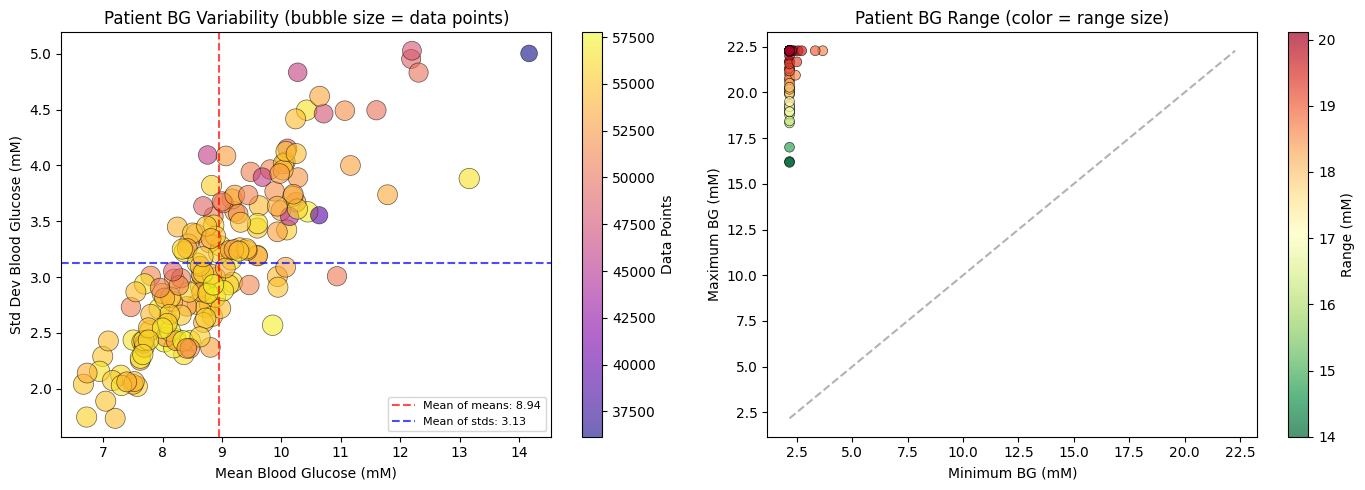


Summary across 168 patients:
  Mean BG: 8.94 ± 1.23 mM
  Mean Std Dev: 3.13 ± 0.70 mM
  Mean Range: 19.60 mM


In [36]:
# Per-patient BG statistics - scatter plot visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

patient_ids = list(loader.processed_data.keys())

# Determine which BG column to use
bg_col = "bg_mM" if "bg_mM" in loader.get_combined_data().columns else "bg_mg_dl"
bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"

# Calculate per-patient statistics
patient_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        if len(bg) > 0:
            patient_stats.append(
                {
                    "pid": pid,
                    "mean": bg.mean(),
                    "std": bg.std(),
                    "min": bg.min(),
                    "max": bg.max(),
                    "count": len(bg),
                }
            )

# Plot 1: Mean vs Std scatter (bubble size = data count)
ax1 = axes[0]
means = [s["mean"] for s in patient_stats]
stds = [s["std"] for s in patient_stats]
counts = [s["count"] for s in patient_stats]

# Normalize counts for bubble size
size_scale = np.array(counts) / max(counts) * 200 + 20

scatter = ax1.scatter(
    means,
    stds,
    s=size_scale,
    c=counts,
    cmap="plasma",
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel(f"Mean Blood Glucose ({bg_unit})")
ax1.set_ylabel(f"Std Dev Blood Glucose ({bg_unit})")
ax1.set_title("Patient BG Variability (bubble size = data points)")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label("Data Points")

# Add overall mean lines
ax1.axvline(
    x=np.mean(means),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of means: {np.mean(means):.2f}",
)
ax1.axhline(
    y=np.mean(stds),
    color="blue",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of stds: {np.mean(stds):.2f}",
)
ax1.legend(fontsize=8)

# Plot 2: Min-Max range scatter
ax2 = axes[1]
mins = [s["min"] for s in patient_stats]
maxs = [s["max"] for s in patient_stats]
ranges = [s["max"] - s["min"] for s in patient_stats]

scatter2 = ax2.scatter(
    mins,
    maxs,
    s=50,
    c=ranges,
    cmap="RdYlGn_r",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax2.plot(
    [min(mins), max(maxs)],
    [min(mins), max(maxs)],
    "k--",
    alpha=0.3,
    label="Min=Max line",
)
ax2.set_xlabel(f"Minimum BG ({bg_unit})")
ax2.set_ylabel(f"Maximum BG ({bg_unit})")
ax2.set_title("Patient BG Range (color = range size)")
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label(f"Range ({bg_unit})")

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary across {len(patient_stats)} patients:")
print(f"  Mean BG: {np.mean(means):.2f} ± {np.std(means):.2f} {bg_unit}")
print(f"  Mean Std Dev: {np.mean(stds):.2f} ± {np.std(stds):.2f} {bg_unit}")
print(f"  Mean Range: {np.mean(ranges):.2f} {bg_unit}")

### 6.3 Time-in-Range Analysis

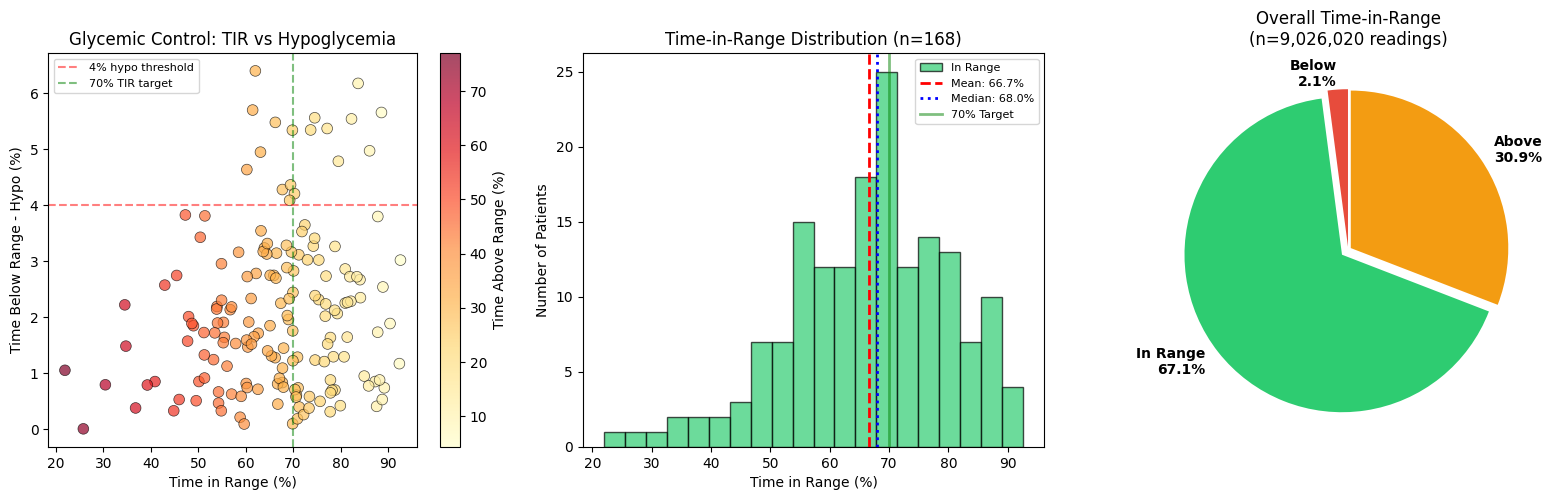


Time-in-Range Summary (168 patients):
  Mean TIR: 66.7% (target: >70%)
  Mean Time Below: 2.1% (target: <4%)
  Mean Time Above: 31.2% (target: <25%)
  Patients meeting 70% TIR: 70/168


In [37]:
# Time-in-Range Analysis - scatter and distribution plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds based on unit
if bg_col == "bg_mM":
    target_low, target_high = 3.9, 10.0
else:
    target_low, target_high = 70, 180

# Calculate time-in-range for each patient
tir_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        total = len(bg)
        if total > 0:
            below = (bg < target_low).sum() / total * 100
            above = (bg > target_high).sum() / total * 100
            in_range = 100 - below - above
            tir_stats.append(
                {
                    "pid": pid,
                    "below": below,
                    "in_range": in_range,
                    "above": above,
                    "count": total,
                }
            )

below_pcts = [s["below"] for s in tir_stats]
in_range_pcts = [s["in_range"] for s in tir_stats]
above_pcts = [s["above"] for s in tir_stats]
counts = [s["count"] for s in tir_stats]

# Plot 1: Scatter - Time in Range vs Time Below (hypo risk visualization)
ax1 = axes[0]
scatter1 = ax1.scatter(
    in_range_pcts,
    below_pcts,
    s=60,
    c=above_pcts,
    cmap="YlOrRd",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel("Time in Range (%)")
ax1.set_ylabel("Time Below Range - Hypo (%)")
ax1.set_title("Glycemic Control: TIR vs Hypoglycemia")
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label("Time Above Range (%)")
ax1.axhline(y=4, color="red", linestyle="--", alpha=0.5, label="4% hypo threshold")
ax1.axvline(x=70, color="green", linestyle="--", alpha=0.5, label="70% TIR target")
ax1.legend(fontsize=8)

# Plot 2: Distribution of Time-in-Range (histogram)
ax2 = axes[1]
ax2.hist(
    in_range_pcts,
    bins=20,
    color="#2ECC71",
    edgecolor="black",
    alpha=0.7,
    label="In Range",
)
ax2.axvline(
    x=np.mean(in_range_pcts),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=np.median(in_range_pcts),
    color="blue",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=70, color="green", linestyle="-", linewidth=2, alpha=0.5, label="70% Target"
)
ax2.set_xlabel("Time in Range (%)")
ax2.set_ylabel("Number of Patients")
ax2.set_title(f"Time-in-Range Distribution (n={len(tir_stats)})")
ax2.legend(fontsize=8)

# Plot 3: Overall cohort pie chart
ax3 = axes[2]
combined_bg = loader.get_combined_data()[bg_col].dropna()
total = len(combined_bg)

if total > 0:
    overall_below = (combined_bg < target_low).sum() / total * 100
    overall_above = (combined_bg > target_high).sum() / total * 100
    overall_in_range = 100 - overall_below - overall_above

    sizes = [overall_below, overall_in_range, overall_above]
    labels = [
        f"Below\n{overall_below:.1f}%",
        f"In Range\n{overall_in_range:.1f}%",
        f"Above\n{overall_above:.1f}%",
    ]
    colors = ["#E74C3C", "#2ECC71", "#F39C12"]
    explode = (0.02, 0.05, 0.02)

    wedges, texts = ax3.pie(
        sizes,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={"fontsize": 10, "fontweight": "bold"},
    )
    ax3.set_title(f"Overall Time-in-Range\n(n={total:,} readings)")

plt.tight_layout()
plt.show()

# Print TIR summary
print(f"\nTime-in-Range Summary ({len(tir_stats)} patients):")
print(f"  Mean TIR: {np.mean(in_range_pcts):.1f}% (target: >70%)")
print(f"  Mean Time Below: {np.mean(below_pcts):.1f}% (target: <4%)")
print(f"  Mean Time Above: {np.mean(above_pcts):.1f}% (target: <25%)")
print(
    f"  Patients meeting 70% TIR: {sum(1 for t in in_range_pcts if t >= 70)}/{len(tir_stats)}"
)

## 7. Sample Data Inspection

Quick look at the actual data content for one patient.

In [38]:
sample_patient_id = loader.patient_ids[0]
sample_df = loader.get_patient_data(sample_patient_id)

print(f"Sample data for patient '{sample_patient_id}':")
print("\nFirst 5 rows:")
display(sample_df.head())

print("\nLast 5 rows:")
display(sample_df.tail())

print("\nData types:")
print(sample_df.dtypes)

Sample data for patient '171':

First 5 rows:


,p_num,period,bg_mM,rate,dose_units,bolus_type,bolus,cob,carb_availability,insulin_availability,iob
datetime,,,,,,,,,,,
2018-04-07 00:00:00,171.0,1. Baseline,5.06,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2018-04-07 00:05:00,171.0,1. Baseline,4.89,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2018-04-07 00:10:00,171.0,1. Baseline,4.72,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2018-04-07 00:15:00,171.0,1. Baseline,4.56,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2018-04-07 00:20:00,171.0,1. Baseline,4.33,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0



Last 5 rows:


,p_num,period,bg_mM,rate,dose_units,bolus_type,bolus,cob,carb_availability,insulin_availability,iob
datetime,,,,,,,,,,,
2018-10-24 08:50:00,171.0,2. Post Randomization,9.67,NaN,0.08,NaN,0.00,NaN,NaN,0.12,2.59
2018-10-24 08:55:00,171.0,2. Post Randomization,10.67,1.119,0.09,NaN,0.00,NaN,NaN,0.12,2.58
2018-10-24 09:00:00,171.0,2. Post Randomization,10.50,3.207,0.27,NaN,0.00,NaN,NaN,0.13,2.74
2018-10-24 09:05:00,171.0,2. Post Randomization,10.17,2.686,0.22,NaN,0.00,NaN,NaN,0.13,2.87
2018-10-24 09:10:00,171.0,2. Post Randomization,9.72,0.950,5.22,Standard,5.14,NaN,NaN,0.13,7.99



Data types:
p_num                   float64
period                   object
bg_mM                   float64
rate                    float64
dose_units              float64
bolus_type               object
bolus                   float64
cob                     float64
carb_availability       float64
insulin_availability    float64
iob                     float64
dtype: object


In [39]:
# Basic statistics for numeric columns
print(f"\nDescriptive statistics for patient '{sample_patient_id}':")
display(sample_df.describe())


Descriptive statistics for patient '171':


,p_num,bg_mM,rate,dose_units,bolus,cob,carb_availability,insulin_availability,iob
count,57711.0,54977.000000,21966.000000,57711.000000,57711.000000,0.0,0.0,57711.000000,57711.000000
mean,171.0,6.994299,0.720164,0.157223,0.101720,NaN,NaN,0.188431,3.487930
std,0.0,2.288243,0.594543,0.781773,0.777361,NaN,NaN,0.173824,3.231879
min,171.0,2.170000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,171.0,5.560000,0.263000,0.020000,0.000000,NaN,NaN,0.070000,1.280000
50%,171.0,6.610000,0.675500,0.070000,0.000000,NaN,NaN,0.110000,2.110000
75%,171.0,8.170000,0.900000,0.070000,0.000000,NaN,NaN,0.290000,5.200000
max,171.0,19.170000,5.116000,15.070000,15.000002,NaN,NaN,1.130000,22.180000


## 8. Validation Summary

Final checks to confirm the data loader is working correctly.

In [40]:
print("=" * 60)
print("VALIDATION SUMMARY")
print("=" * 60)

checks = [
    ("dataset_name property", loader.dataset_name is not None),
    ("num_patients property", loader.num_patients > 0),
    ("patient_ids property", len(loader.patient_ids) > 0),
    (
        "processed_data populated",
        loader.processed_data is not None and len(loader.processed_data) > 0,
    ),
    (
        "train_data populated",
        loader.train_data is not None and len(loader.train_data) > 0,
    ),
    (
        "validation_data populated",
        loader.validation_data is not None and len(loader.validation_data) > 0,
    ),
    (
        "get_patient_data() works",
        loader.get_patient_data(loader.patient_ids[0]) is not None,
    ),
    ("get_combined_data() works", not loader.get_combined_data().empty),
]

all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}: {check_name}")
    if not passed:
        all_passed = False

print("=" * 60)
if all_passed:
    print("All validation checks PASSED!")
else:
    print("Some validation checks FAILED. Please review.")

VALIDATION SUMMARY
  ✅ PASS: dataset_name property
  ✅ PASS: num_patients property
  ✅ PASS: patient_ids property
  ✅ PASS: processed_data populated
  ✅ PASS: train_data populated
  ✅ PASS: validation_data populated
  ✅ PASS: get_patient_data() works
  ✅ PASS: get_combined_data() works
All validation checks PASSED!
